# Fisher Discriminant Analysis

First off we import necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from numpy.linalg import inv, eig

We define the number of points in each class, covariance matrix and mean of every class in accordance with the requirements of the exercise.

In [2]:
n = 30
cov = np.array([[1, 0], [0, 1]])
means = {'A': np.array([-1, 1]), 'B': np.array([2, 4]), 'C': np.array([-2, 2])}

We generate the data from multivariate normal distribution and insert it into the dataframe

In [3]:
data = pd.DataFrame(index=range(n*len(means)), columns=['x','y','label'])
for i, label in enumerate(means.keys()):
    data.loc[i*n:((i+1)*n)-1, ['x','y']] = np.random.multivariate_normal(means[label], cov, n)
    data.loc[i*n:((i+1)*n)-1, ['label']] = label

Next we define a function that plots the points from the dataframe.

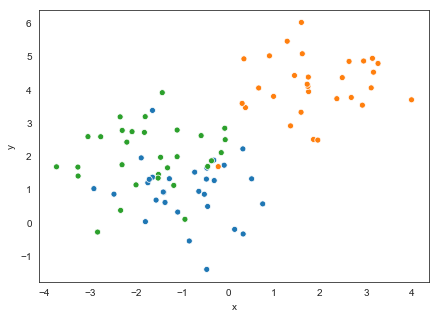

In [4]:
def plot_points(data):
    fig = plt.figure(figsize=(7,5))
    sns.set_style('white')
    sns.scatterplot(data=data, x='x', y='y', hue='label', legend=False)
    
plot_points(data)

We compute a mean of all the points without distinguishing classes. Next we compute between class covariance matrix based on the equation:

\begin{equation}
\boldsymbol{B} = \frac{1}{g - 1}\sum_{k=1}^{g}n_{k}(\boldsymbol{m_{k}} - \boldsymbol{m})(\boldsymbol{m_{k}} - \boldsymbol{m})^{T}
\end{equation}

and within class covariance matrix based on the equation:

\begin{equation}
\boldsymbol{W} = \frac{1}{n - g}\sum_{k=1}^{g}(n_{k} - 1)\boldsymbol{S_{k}}.
\end{equation}

However we can simplify the above expression into the form:

\begin{equation}
\boldsymbol{W} = \boldsymbol{S}
\end{equation}

because for every class number of points and covariance matrix are identical.

In [5]:
mean = np.mean(np.array([means[i] for i in means]), axis=0)
outer_products = [np.outer(value - mean, value - mean) for value in means.values()]
bc_cov = sum(n * outer_products) / (len(means) - 1)
wc_cov = cov

We define the matrix $\boldsymbol{U}$:

\begin{equation}
\boldsymbol{U} = \boldsymbol{W^{-1}}\boldsymbol{B},
\end{equation}

determine eigenvalues and eigenvectors of that matrix and choose the eigenvector corresponding to the maximum eigenvalue.

In [6]:
U = np.dot(inv(wc_cov), bc_cov)
eig_values, eig_vectors = eig(U)
a = eig_vectors[np.argmax(eig_values)]

Now we can plot the line with a slope defined by the chosen eigenvector.

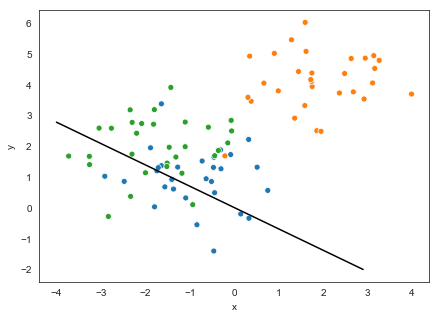

In [7]:
plot_points(data)
plt.plot(np.arange(-4, 3, 0.1), a[1] / a[0] * np.arange(-4, 3, 0.1), 'k')

After that we define a function that projects the points on the the line.

In [8]:
def projection(data, slope):
    data_cp = data.copy()
    data_cp['x'] = (data['x'] + slope * data['y']) / (slope**2 + 1)
    data_cp['y'] = slope * data_cp['x']
    return data_cp

proj_data = projection(data, a[1] / a[0])

Finally we can plot the projected points.

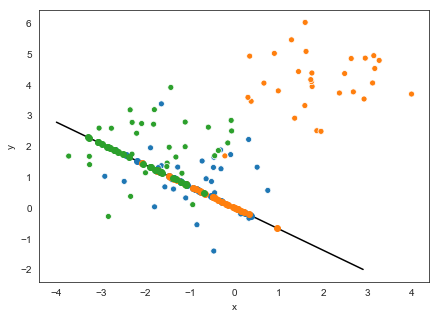

In [9]:
plot_points(data)
plt.plot(np.arange(-4, 3, 0.1), a[1] / a[0] * np.arange(-4, 3, 0.1), 'k')
for label in means.keys():
    plt.plot(proj_data.loc[proj_data['label'] == label]['x'], proj_data.loc[proj_data['label'] == label]['y'], 'o')